# Problem Statement

Analyze IT job market trends in India by leveraging a dataset containing job listings from the country's top job portals. 

The objective is to:
- Identify patterns in employment trends.
- Understand salary distributions and in-demand skills.
- Explore hiring behaviors of companies.

This analysis aims to support data-driven decision-making for job seekers, employers, and policymakers. 


In [119]:
#importing libraries

import pandas as pd
import seaborn as sns
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [120]:
df=pd.read_csv("D:\Data_Set\india_job_market_dataset.csv")
df

,Job ID,Job Title,Company Name,Job Location,Job Type,Salary Range,Experience Required,Posted Date,Application Deadline,Job Portal,Number of Applicants,Education Requirement,Skills Required,Remote/Onsite,Company Size
0,JOB1,Software Engineer,Amazon,Ahmedabad,Full-time,5-8 LPA,2-5 years,16-01-2025,25-01-2025,LinkedIn,23,PhD,"C++, SQL, Python",Remote,Small (1-50)
1,JOB2,Marketing Executive,Infosys,Ahmedabad,Internship,5-8 LPA,2-5 years,25-12-2024,19-01-2025,Indeed,462,MBA,"SQL, C++, Python",Remote,Large (500+)
2,JOB3,Financial Analyst,Deloitte,Jaipur,Contract,20+ LPA,5-10 years,22-01-2025,29-01-2025,Naukri.com,430,M.Tech,"Machine Learning, Excel, React",Remote,Large (500+)
3,JOB4,Business Analyst,Amazon,Delhi,Full-time,20+ LPA,2-5 years,07-01-2025,06-02-2025,LinkedIn,387,B.Tech,"Machine Learning, Python, SQL",Hybrid,Small (1-50)
4,JOB5,Software Engineer,Infosys,Delhi,Full-time,12-20 LPA,10+ years,26-12-2024,08-01-2025,Indeed,199,MBA,"UI/UX, C++, Java",Onsite,Small (1-50)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,JOB19996,Marketing Executive,Deloitte,Pune,Full-time,5-8 LPA,2-5 years,13-01-2025,05-02-2025,Indeed,171,PhD,"Machine Learning, Python, AWS",Remote,Small (1-50)
19996,JOB19997,Business Analyst,Accenture,Bangalore,Internship,20+ LPA,0-2 years,08-01-2025,27-01-2025,LinkedIn,482,MBA,"Digital Marketing, React, Machine Learning",Onsite,Medium (51-500)
19997,JOB19998,Graphic Designer,Wipro,Jaipur,Part-time,5-8 LPA,5-10 years,26-12-2024,16-01-2025,Naukri.com,319,PhD,"Machine Learning, Excel, Digital Marketing",Onsite,Small (1-50)
19998,JOB19999,Sales Representative,Infosys,Kolkata,Internship,12-20 LPA,2-5 years,20-01-2025,09-02-2025,Naukri.com,178,M.Tech,"Excel, C++, React",Onsite,Large (500+)


In [121]:
df.shape

(20000, 15)

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Job ID                 20000 non-null  object
 1   Job Title              20000 non-null  object
 2   Company Name           20000 non-null  object
 3   Job Location           20000 non-null  object
 4   Job Type               20000 non-null  object
 5   Salary Range           20000 non-null  object
 6   Experience Required    20000 non-null  object
 7   Posted Date            20000 non-null  object
 8   Application Deadline   20000 non-null  object
 9   Job Portal             20000 non-null  object
 10  Number of Applicants   20000 non-null  int64 
 11  Education Requirement  20000 non-null  object
 12  Skills Required        20000 non-null  object
 13  Remote/Onsite          20000 non-null  object
 14  Company Size           20000 non-null  object
dtypes: int64(1), object

In [123]:
df.columns

Index(['Job ID', 'Job Title', 'Company Name', 'Job Location', 'Job Type',
       'Salary Range', 'Experience Required', 'Posted Date',
       'Application Deadline', 'Job Portal', 'Number of Applicants',
       'Education Requirement', 'Skills Required', 'Remote/Onsite',
       'Company Size'],
      dtype='object')

In [124]:
df.isna().sum()

Job ID                   0
Job Title                0
Company Name             0
Job Location             0
Job Type                 0
Salary Range             0
Experience Required      0
Posted Date              0
Application Deadline     0
Job Portal               0
Number of Applicants     0
Education Requirement    0
Skills Required          0
Remote/Onsite            0
Company Size             0
dtype: int64

In [125]:
df.duplicated().sum()

np.int64(0)

In [126]:
# df["Posted Date "]=pd.to_datetime(df["Posted Date"],format='mixed')## Convert date to datetime format 
df["Posted Date"] = pd.to_datetime(df["Posted Date"])
df["Application Deadline"] = pd.to_datetime(df["Application Deadline"])

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Job ID                 20000 non-null  object        
 1   Job Title              20000 non-null  object        
 2   Company Name           20000 non-null  object        
 3   Job Location           20000 non-null  object        
 4   Job Type               20000 non-null  object        
 5   Salary Range           20000 non-null  object        
 6   Experience Required    20000 non-null  object        
 7   Posted Date            20000 non-null  datetime64[ns]
 8   Application Deadline   20000 non-null  datetime64[ns]
 9   Job Portal             20000 non-null  object        
 10  Number of Applicants   20000 non-null  int64         
 11  Education Requirement  20000 non-null  object        
 12  Skills Required        20000 non-null  object        
 13  R

In [128]:
df['Month'] = df['Posted Date'].dt.month_name()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Job ID                 20000 non-null  object        
 1   Job Title              20000 non-null  object        
 2   Company Name           20000 non-null  object        
 3   Job Location           20000 non-null  object        
 4   Job Type               20000 non-null  object        
 5   Salary Range           20000 non-null  object        
 6   Experience Required    20000 non-null  object        
 7   Posted Date            20000 non-null  datetime64[ns]
 8   Application Deadline   20000 non-null  datetime64[ns]
 9   Job Portal             20000 non-null  object        
 10  Number of Applicants   20000 non-null  int64         
 11  Education Requirement  20000 non-null  object        
 12  Skills Required        20000 non-null  object        
 13  R

In [129]:
df.describe()

,Posted Date,Application Deadline,Number of Applicants
count,20000,20000,20000.000000
mean,2025-01-07 01:09:02.880000,2025-01-25 14:34:13.440000,256.723300
min,2024-12-23 00:00:00,2024-12-30 00:00:00,10.000000
25%,2024-12-30 00:00:00,2025-01-17 00:00:00,134.000000
50%,2025-01-07 00:00:00,2025-01-26 00:00:00,258.000000
75%,2025-01-15 00:00:00,2025-02-03 00:00:00,380.000000
max,2025-01-22 00:00:00,2025-02-21 00:00:00,500.000000
std,NaN,NaN,141.745833


# Exploratory data analysis (EDA)

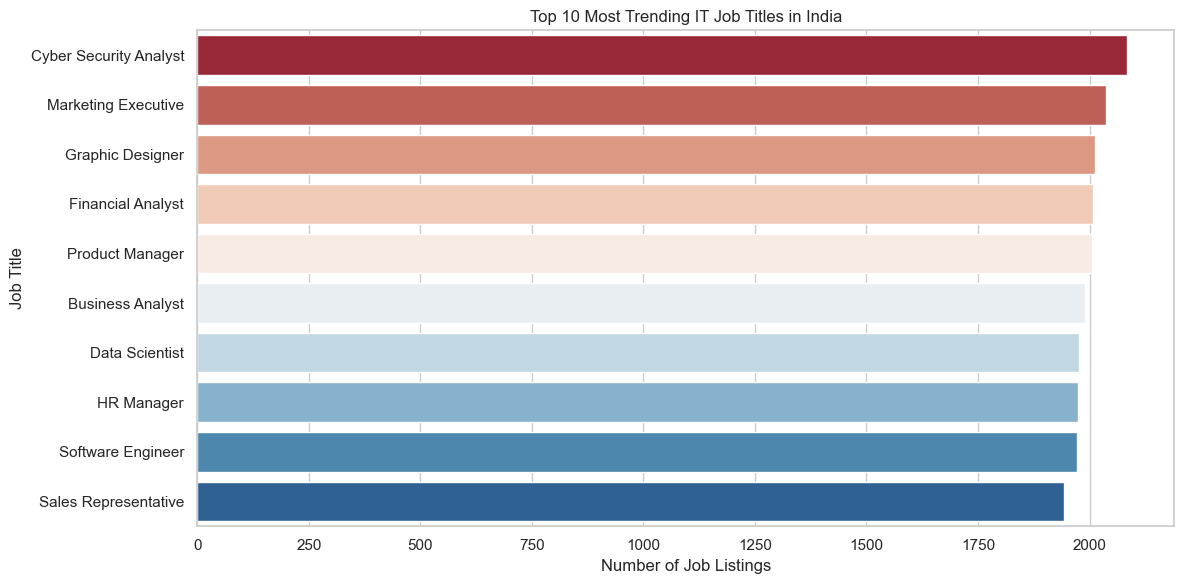

In [130]:
plt.figure(figsize=(12, 6))

# Get the top 10 most common job titles
top_jobs = df["Job Title"].value_counts()

# Create the bar plot
sns.barplot(x=top_jobs.values, y=top_jobs.index, palette="RdBu")

# Customize the plot
plt.xlabel("Number of Job Listings")
plt.ylabel("Job Title")
plt.title("Top 10 Most Trending IT Job Titles in India")
# plt.xticks(rotation=70, ha='right')  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

Observation:
    
    *In the graph we can see, The current trending Job Titles in Indian IT job market. 
    *The Cyber Security Analyst has Higher Count of job listing than others.

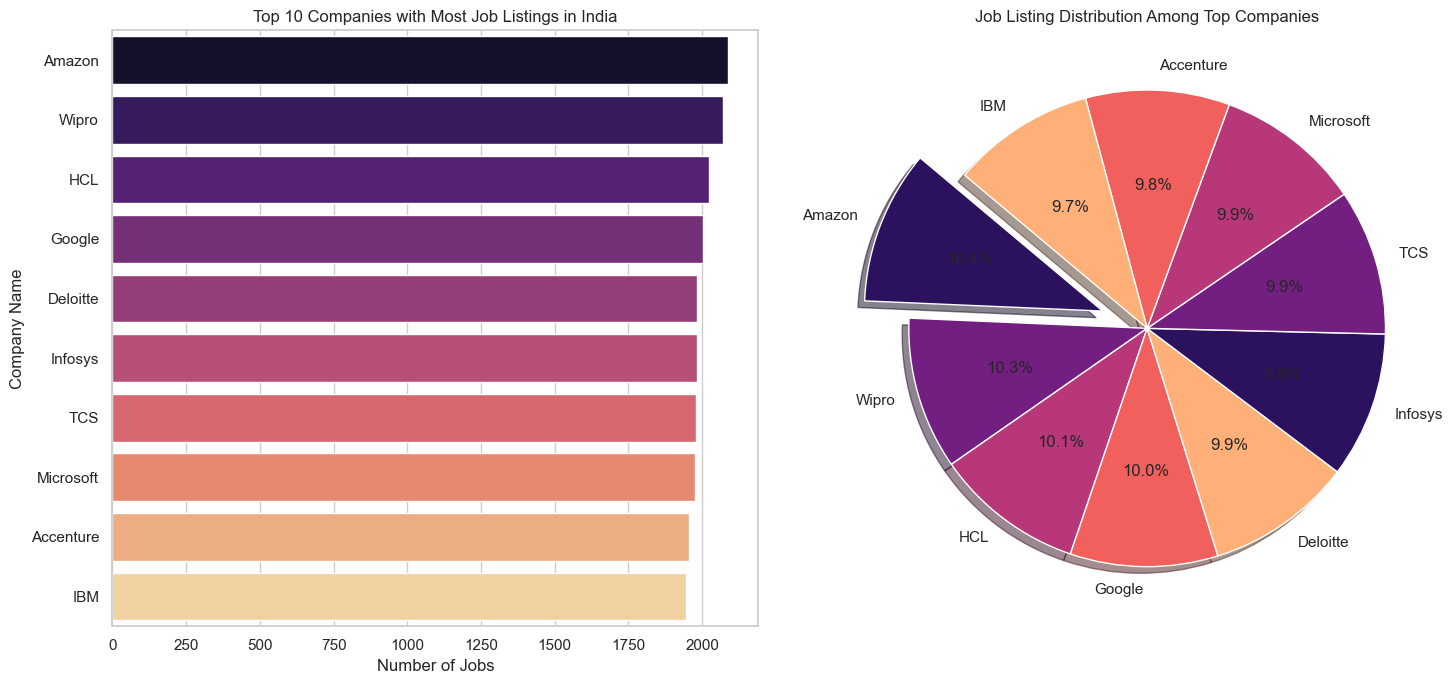

In [131]:
# Get the top 10 companies with the most job listings
top_companies = df["Company Name"].value_counts().head(10)

# Create the figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 7))  # 1 row, 2 columns

# Bar plot
sns.barplot(x=top_companies.values, y=top_companies.index, palette="magma", ax=axes[0])
axes[0].set_xlabel("Number of Jobs")
axes[0].set_ylabel("Company Name")
axes[0].set_title("Top 10 Companies with Most Job Listings in India")

# Prepare "cake slice" effect for the pie chart
explode = [0.2] + [0] * (len(top_companies) - 1)  # Explode the first slice

# Pie chart with "cake slice" effect
axes[1].pie(
    top_companies.values,
    labels=top_companies.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette("magma", n_colors=5),
    explode=explode,  # Add the cake slice effect
    shadow=True,      # Add shadow for a 3D effect
    wedgeprops={'edgecolor': 'white'}  # To make the slices stand out
)
axes[1].set_title("Job Listing Distribution Among Top Companies")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


Observation:

    *These are the Top 10 Companies with Most Job Listings in India.
    *Amazon, Wipro, HCL & Google has the most job listing companies in India.
    *And Amazon has most Job listings.

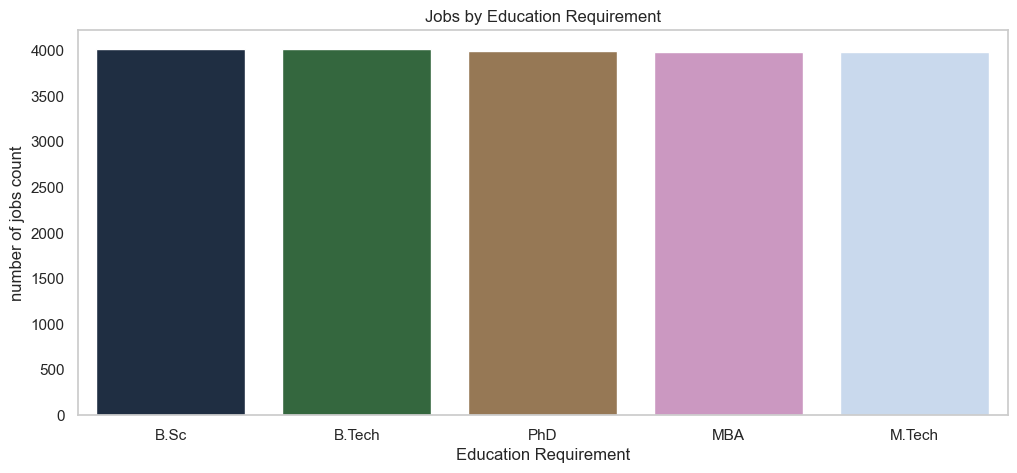

In [132]:
plt.figure(figsize=(12, 5))
sns.barplot(df['Education Requirement'].value_counts(), palette="cubehelix")
plt.title('Jobs by Education Requirement')
plt.xlabel('Education Requirement')
plt.ylabel('number of jobs count')
plt.grid(axis='y')
plt.show()

Observation:

    *There is very small difference in the qualifications.
    *But, For the job in an IT field Bachelor's Degree is required.

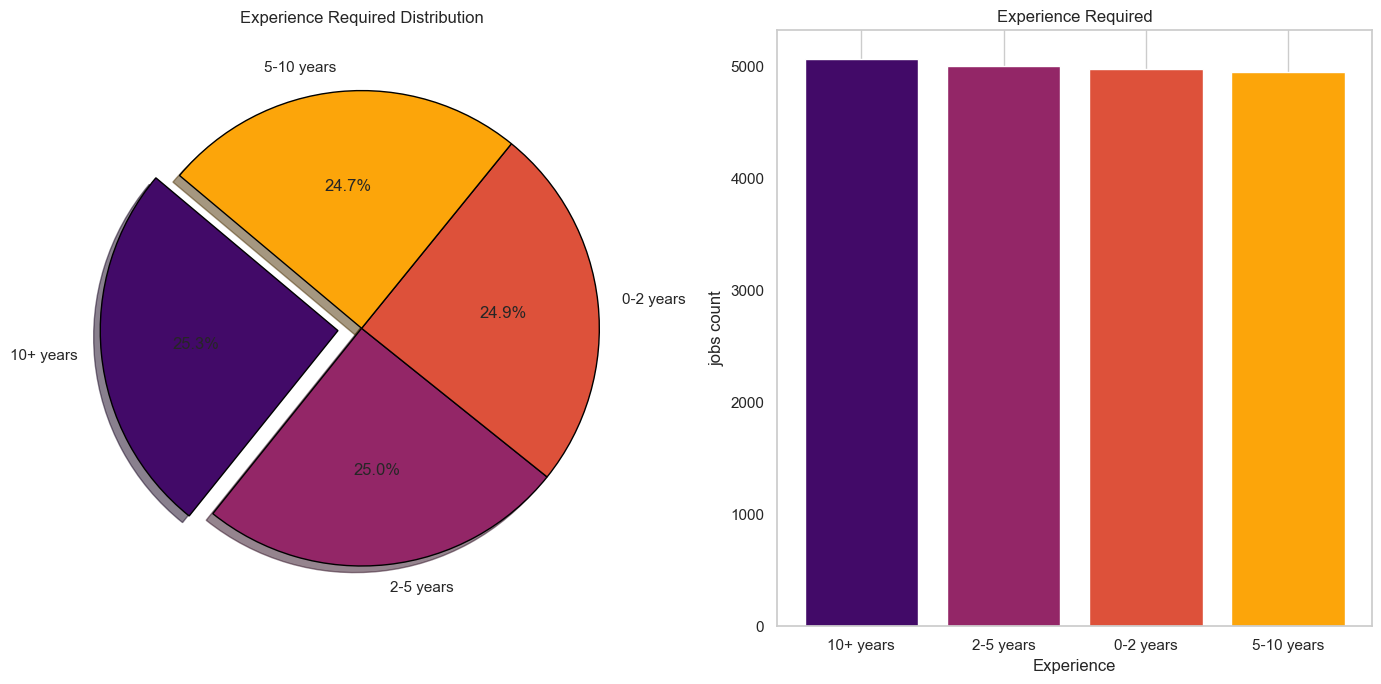

In [133]:
# Get the counts of experience required
top_locations = df["Experience Required"].value_counts()

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 7))  # 1 row, 2 columns

# Add the slice effect by exploding the first slice for the pie chart
explode = [0.1] + [0] * (len(top_locations) - 1)

# Plot the pie chart on the first subplot
axes[0].pie(
    top_locations.values, 
    labels=top_locations.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=sns.color_palette("inferno", n_colors=len(top_locations)),
    explode=explode,  # Add the slice effect
    shadow=True,  # Add shadow for depth
    wedgeprops={'edgecolor': 'black'}  # Highlight edges for clarity
)
axes[0].set_title("Experience Required Distribution")

# Plot a bar chart on the second subplot
axes[1].bar(
    top_locations.index, 
    top_locations.values, 
    color=sns.color_palette("inferno", n_colors=len(top_locations))
)
axes[1].set_title("Experience Required")
axes[1].set_ylabel("jobs count")
axes[1].set_xlabel("Experience")
# axes[1].tick_params(axis='x', rotation=45)
plt.grid(axis='y')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

Observation:

    *We can see clearly companies are hiring those who has higher experience Level.

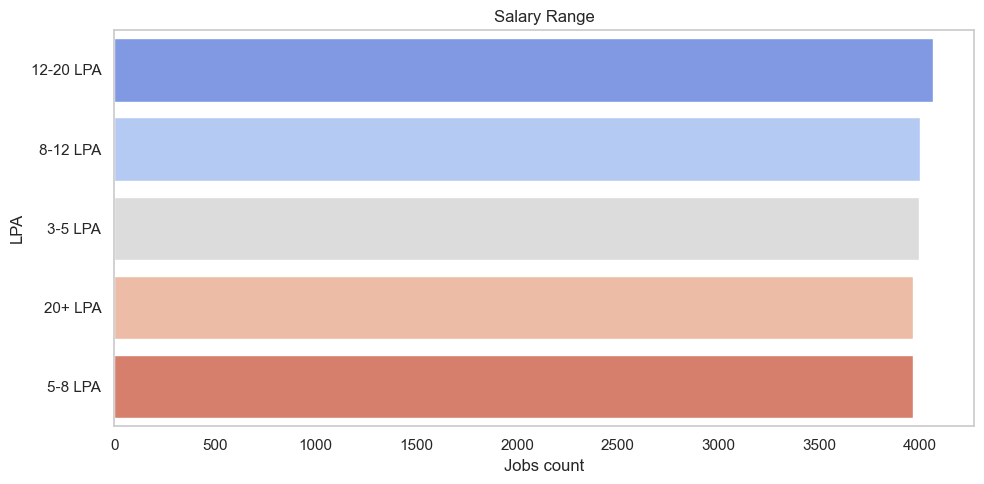

In [134]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y="Salary Range", palette="coolwarm", order=df["Salary Range"].value_counts().index)
plt.xlabel("Jobs count")
plt.ylabel("LPA")
plt.title("Salary Range")
plt.tight_layout()
plt.grid(axis='x')
plt.show()

Observation:

    *There are many different salary ranges for the different jobs.
    *Most of the listed jobs are offering the 12-20 LPA Salary Range.

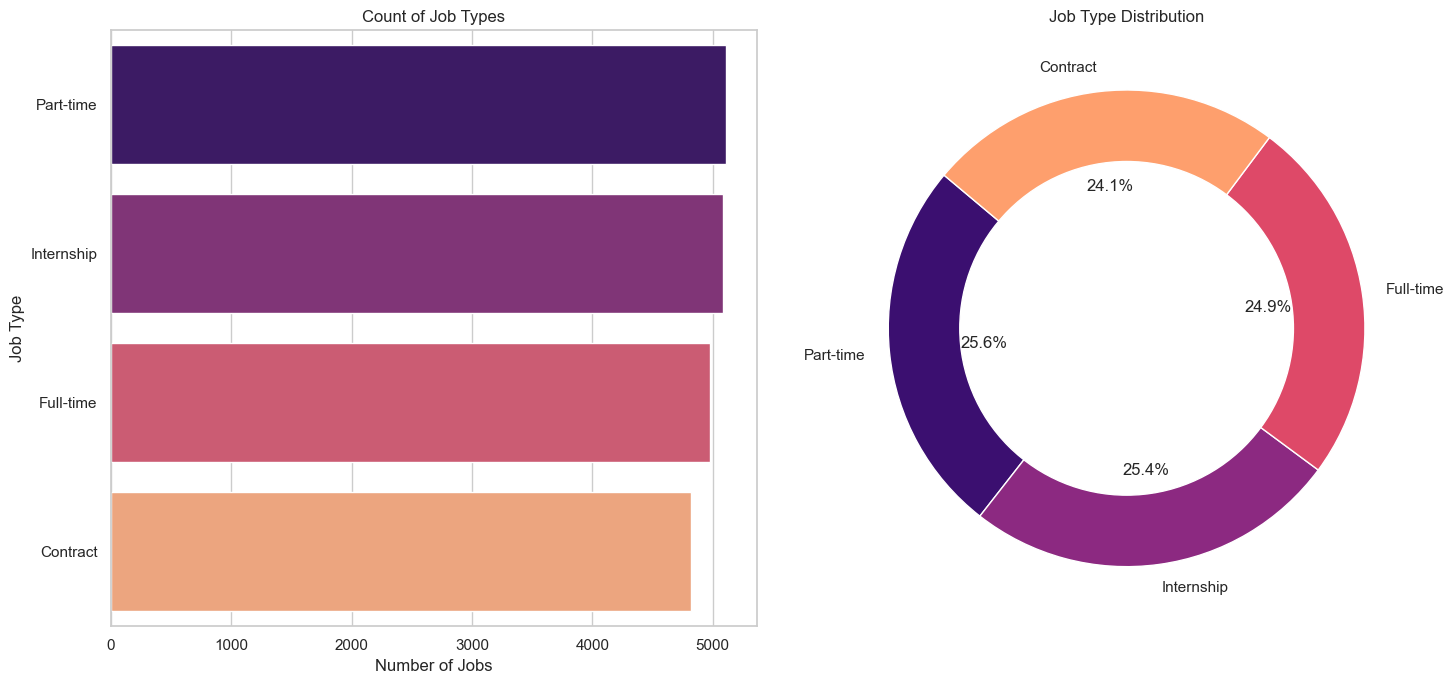

In [135]:
# Get job type counts
job_type_counts = df["Job Type"].value_counts()

# Create the figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 7))  # 1 row, 2 columns

# Horizontal bar plot
sns.barplot(
    x=job_type_counts.values,
    y=job_type_counts.index,
    palette="magma",
    ax=axes[0]
)
axes[0].set_xlabel("Number of Jobs")
axes[0].set_ylabel("Job Type")
axes[0].set_title("Count of Job Types")

# Donut chart
wedges, texts, autotexts = axes[1].pie(
    job_type_counts.values,
    labels=job_type_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette("magma", n_colors=len(job_type_counts)),
    wedgeprops={'edgecolor': 'white'}
)
# Add a center circle for the donut effect
center_circle = plt.Circle((0, 0), 0.70, fc='white')
axes[1].add_artist(center_circle)
axes[1].set_title("Job Type Distribution")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

Observartion:

    *There are more job listings for the partime jobs & Internships.
    *The Job market is opening for Students as well as Freshers.

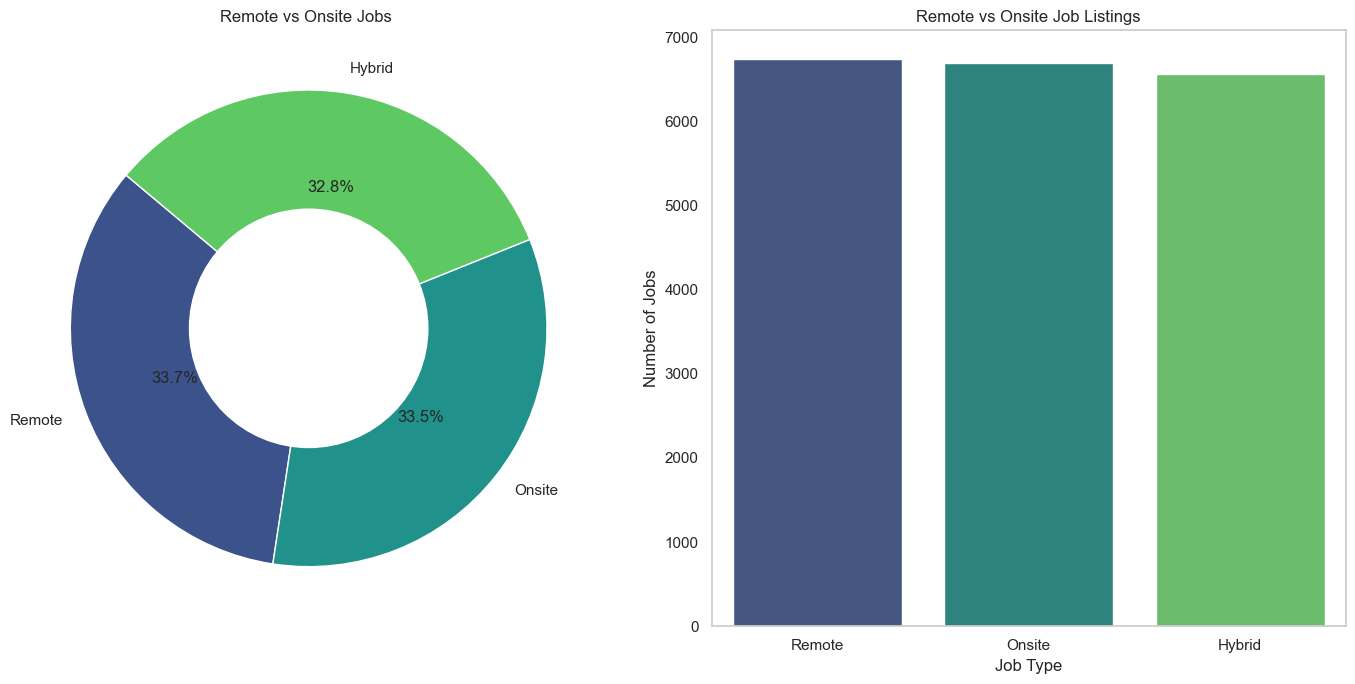

In [136]:
# Get the counts of remote vs onsite jobs
remote_jobs = df["Remote/Onsite"].value_counts()

# Create subplots: one for the donut chart and one for the bar chart
fig, axes = plt.subplots(1, 2, figsize=(14, 7))  # 1 row, 2 columns

# Donut chart (a pie chart with a hole)
axes[0].pie(
    remote_jobs.values, 
    labels=remote_jobs.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=sns.color_palette("viridis", n_colors=len(remote_jobs)),
    wedgeprops={'edgecolor': 'white', 'linewidth': 1}
)
# Add the hole for the donut effect
center_circle = plt.Circle((0, 0), 0.5, color='white')
axes[0].add_artist(center_circle)
axes[0].set_title("Remote vs Onsite Jobs ")

# Bar chart
sns.barplot(
    x=remote_jobs.index, 
    y=remote_jobs.values, 
    palette="viridis", 
    ax=axes[1]
)
axes[1].set_xlabel("Job Type")
axes[1].set_ylabel("Number of Jobs")
axes[1].set_title("Remote vs Onsite Job Listings")
plt.grid(axis='y')
# Adjust layout
plt.tight_layout()
plt.show()

Observation:

    *In the graph, we can see the job types have quite a like percentage.
    *Companies are prefering all the 3 types and giving the oppourtunities to work with there comfortabilty. 

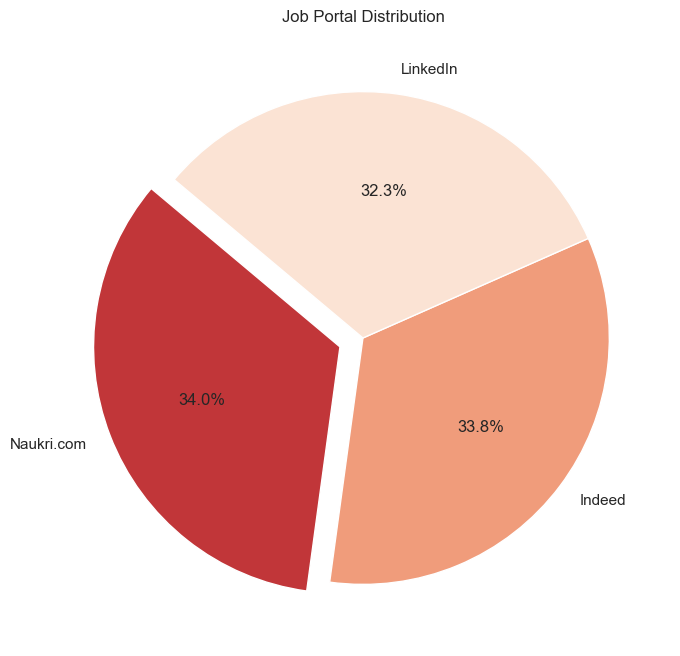

In [137]:
# Get the top job portals by count
top_locations = df["Job Portal"].value_counts()

# Define the explode parameter (e.g., highlighting the first slice)
explode = [0.1] + [0] * (len(top_locations) - 1)  # Highlight only the first slice

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    top_locations.values, 
    labels=top_locations.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    explode=explode,  # Add explode effect
    colors=sns.color_palette("RdBu")
)

# Add a title
plt.title("Job Portal Distribution")
plt.show()

Observation:

    *There is only quite a litte difference between all the Job Portals.
    *Overall, Naukri.com has the most number of job postings.

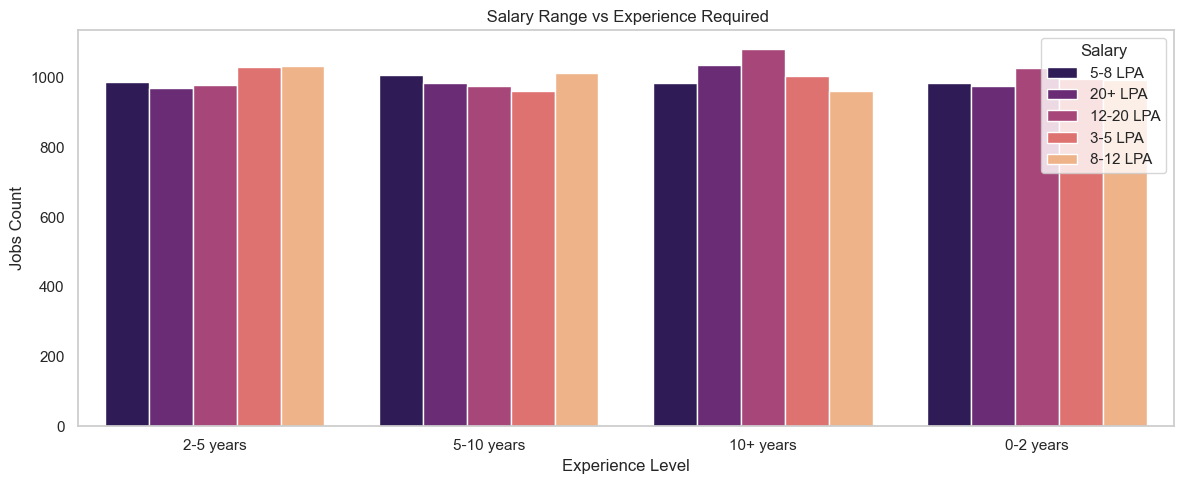

In [138]:
# Create the count plot
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x="Experience Required", hue="Salary Range", palette='magma')

# Add labels and title
plt.title(' Salary Range vs Experience Required')
plt.xlabel('Experience Level')
plt.ylabel('Jobs Count')
plt.legend(title='Salary',loc='upper right')
plt.grid(axis='y')
# Show the plot
plt.tight_layout()
plt.show()

Observation:

    *As we can see,There are many job opportunity for differet salary range and experience level.
    *But, The Salary Range is higher for those who got more experience in the industry. 

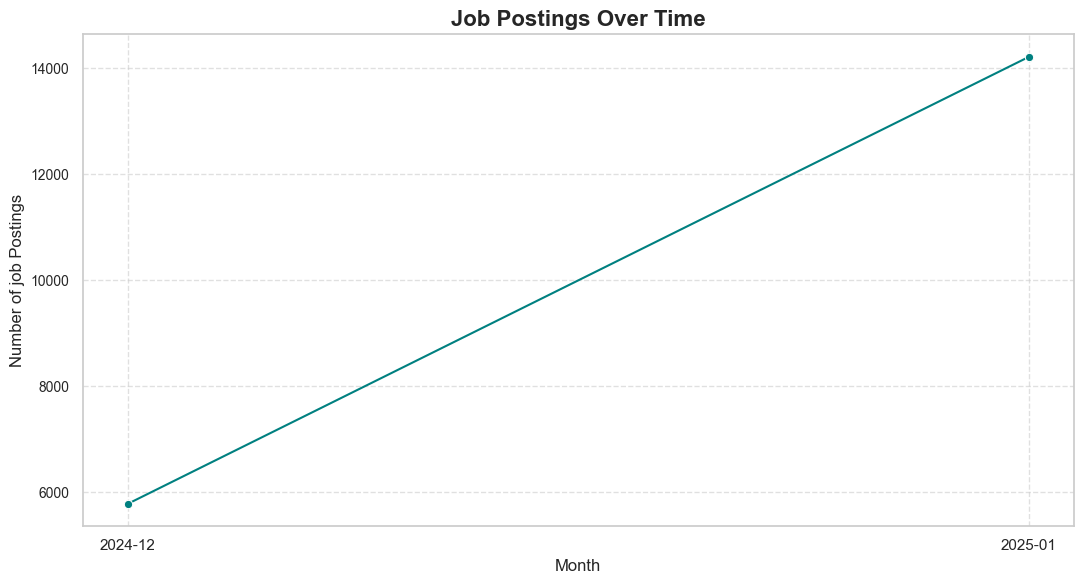

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the Posted Date column is in datetime format
df['Posted Date'] = pd.to_datetime(df['Posted Date'])

# Group data by month
monthly_postings = df['Posted Date'].dt.to_period('M').value_counts().sort_index()

# Set Seaborn theme for better aesthetics
sns.set_theme(style="whitegrid")

# Plot the data using Seaborn
plt.figure(figsize=(11, 6))
sns.lineplot(x=monthly_postings.index.astype(str), y=monthly_postings.values, marker='o', color='teal')

# Customize the plot
plt.title('Job Postings Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of job Postings', fontsize=12)

plt.yticks(fontsize=10)

# Add grid for better readability
plt.grid(visible=True, linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show()

Objective:

    *The graph illustrates a consistent upward trend in the number of job postings over the month.
    *Indicating steady growth in Indian IT job market.

# Conclusion:

    *The Indian IT job market is currently growing with steady and stable pace with higher vacancies.
    *Because of increase in Cyber Crimes, the Cyber Security Analyst is trending on the top of Indian IT job market.
    *More and More companies are giving good salaray ranges for their Experience level.
    *Companies are giving Flexibilities in their job types.
    *The Market is opening more for Students and Freshers.

In [140]:
df.drop("Job ID",axis=1,inplace=True)

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Job Title              20000 non-null  object        
 1   Company Name           20000 non-null  object        
 2   Job Location           20000 non-null  object        
 3   Job Type               20000 non-null  object        
 4   Salary Range           20000 non-null  object        
 5   Experience Required    20000 non-null  object        
 6   Posted Date            20000 non-null  datetime64[ns]
 7   Application Deadline   20000 non-null  datetime64[ns]
 8   Job Portal             20000 non-null  object        
 9   Number of Applicants   20000 non-null  int64         
 10  Education Requirement  20000 non-null  object        
 11  Skills Required        20000 non-null  object        
 12  Remote/Onsite          20000 non-null  object        
 13  C

In [142]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df['Job Title']=le.fit_transform(df['Job Title'])
df['Company Name']=le.fit_transform(df['Company Name'])
df['Job Location']=le.fit_transform(df['Job Location'])
df['Job Type']=le.fit_transform(df['Job Type'])
df['Salary Range']=le.fit_transform(df['Salary Range'])
df['Experience Required']=le.fit_transform(df['Experience Required'])
df['Posted Date']=le.fit_transform(df['Posted Date'])
df['Application Deadline']=le.fit_transform(df['Application Deadline'])
df['Job Portal']=le.fit_transform(df['Job Portal'])
df['Number of Applicants']=le.fit_transform(df['Number of Applicants'])
df['Education Requirement']=le.fit_transform(df['Education Requirement'])
df['Skills Required']=le.fit_transform(df['Skills Required'])
df['Remote/Onsite']=le.fit_transform(df['Remote/Onsite'])
df['Company Size']=le.fit_transform(df['Company Size'])
df['Month']=le.fit_transform(df['Month'])

In [143]:
df.head()

,Job Title,Company Name,Job Location,Job Type,Salary Range,Experience Required,Posted Date,Application Deadline,Job Portal,Number of Applicants,Education Requirement,Skills Required,Remote/Onsite,Company Size,Month
0,9,1,0,1,3,2,24,26,1,13,4,133,2,2,1
1,6,6,0,2,3,2,2,20,0,452,3,589,2,0,0
2,3,2,5,0,1,3,30,30,2,420,2,389,2,0,1
3,0,1,3,1,1,2,15,38,1,377,1,406,0,2,1
4,9,6,3,1,0,1,3,9,0,189,3,659,1,2,0


In [144]:
from sklearn.model_selection import train_test_split

In [145]:
x=df.drop(["Job Title"],axis=1)
y=df["Job Title"]

In [146]:
x.head()

,Company Name,Job Location,Job Type,Salary Range,Experience Required,Posted Date,Application Deadline,Job Portal,Number of Applicants,Education Requirement,Skills Required,Remote/Onsite,Company Size,Month
0,1,0,1,3,2,24,26,1,13,4,133,2,2,1
1,6,0,2,3,2,2,20,0,452,3,589,2,0,0
2,2,5,0,1,3,30,30,2,420,2,389,2,0,1
3,1,3,1,1,2,15,38,1,377,1,406,0,2,1
4,6,3,1,0,1,3,9,0,189,3,659,1,2,0


In [147]:
y.head()

0    9
1    6
2    3
3    0
4    9
Name: Job Title, dtype: int64

In [148]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.30)

In [149]:
print(train_x.shape,train_y.shape,test_x.shape,test_y.shape)

(14000, 14) (14000,) (6000, 14) (6000,)


In [32]:
# reg=LinearRegression()

In [44]:
# reg.fit(train_x,train_y)

In [45]:
# reg.predict(test_x)

In [46]:
# r2_score(test_y,reg.predict(test_x))

In [150]:
from sklearn.tree import DecisionTreeClassifier

In [151]:
#DecisionTree::
dt=DecisionTreeClassifier()
dt.fit(train_x,train_y)
dt_pred=dt.predict(test_x)
dt.score(test_x,test_y)

0.09916666666666667

In [152]:
from sklearn.ensemble import RandomForestClassifier

In [153]:
rfc=RandomForestClassifier()
rfc.fit(train_x,train_y)
rfc_pred=rfc.predict(test_x)
rfc.score(test_x,test_y)

0.09983333333333333

In [154]:
from xgboost import XGBClassifier
#XGBoost::
XGB=XGBClassifier()
XGB.fit(train_x,train_y)
XGB_pred=XGB.predict(test_x)
XGB.score(test_x,test_y)   #this linein next cell

0.1015

In [155]:
from sklearn.svm import SVC

In [156]:
sv=SVC()
sv.fit(train_x,train_y)
sv_pred=sv.predict(test_x)
sv.score(test_x,test_y) 

0.10116666666666667

📅 Date range: 2023-01 to 2024-12


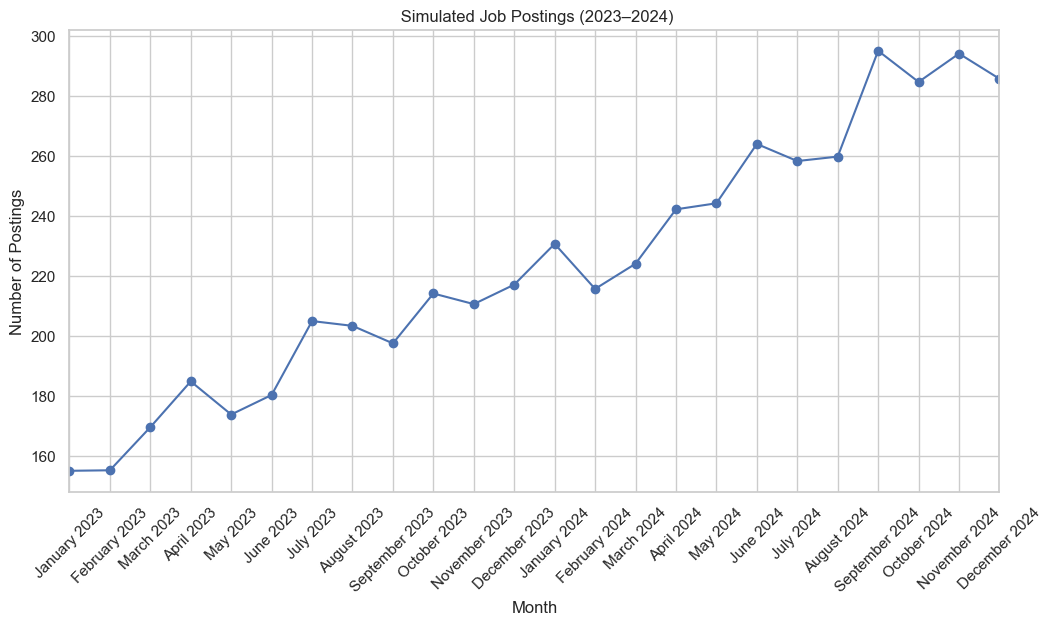

🔍 Best ARIMA order found: (2, 0, 2)


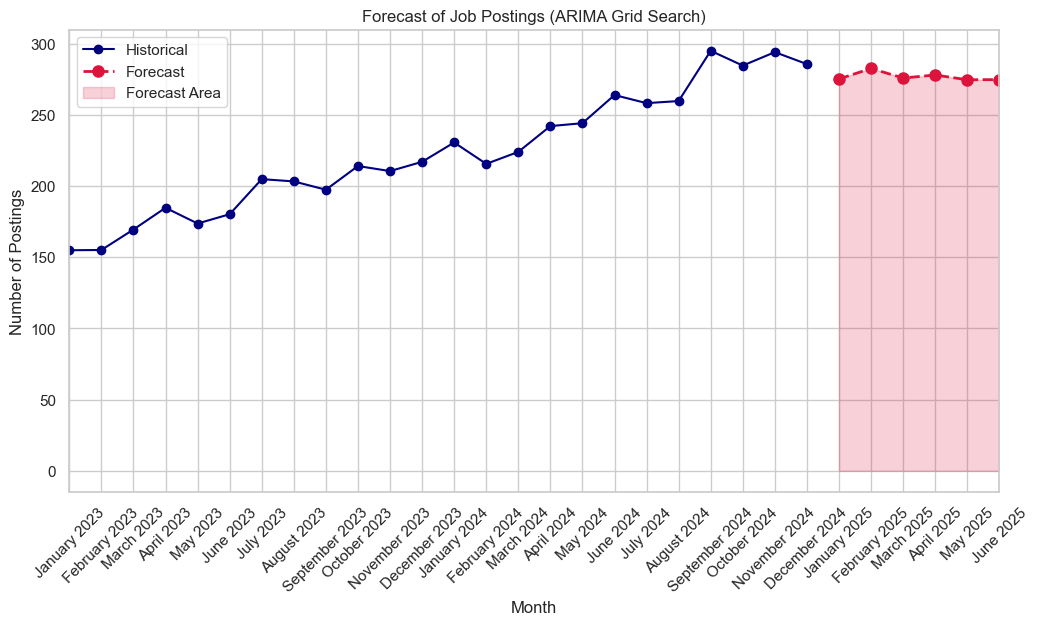

📊 Forecasted Job Postings:

2025-01-31    275.318839
2025-02-28    282.687774
2025-03-31    275.968082
2025-04-30    278.094636
2025-05-31    274.740569
2025-06-30    274.853928
Freq: ME, Name: predicted_mean, dtype: float64


In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tools.eval_measures import rmse

# ✅ Step 1: Simulate realistic job postings with upward trend
np.random.seed(42)
trend = np.linspace(150, 300, 24)                     # gradual upward trend
noise = np.random.normal(0, 10, 24)                   # small randomness
job_postings = trend + noise                          # final series

# Create a datetime index for 24 months
dates = pd.date_range(start="2023-01-01", periods=24, freq='M')
monthly_postings = pd.Series(job_postings, index=dates)

# ✅ Step 2: Check time range
print("📅 Date range:", monthly_postings.index.min().strftime('%Y-%m'), "to", monthly_postings.index.max().strftime('%Y-%m'))

# ✅ Step 3: Plot historical data
plt.figure(figsize=(12, 6))
monthly_postings.plot(marker='o')
plt.title(" Simulated Job Postings (2023–2024)")
plt.xlabel("Month")
plt.ylabel("Number of Postings")
plt.grid(True)

# Format x-axis to show month names
plt.xticks(ticks=monthly_postings.index, labels=monthly_postings.index.strftime('%B %Y'), rotation=45)
plt.show()

# ✅ Step 4: Grid search for best ARIMA parameters (p, d, q)
def evaluate_arima_order(order, data):
    try:
        model = ARIMA(data, order=order)
        result = model.fit()
        return rmse(data, result.fittedvalues)
    except:
        return float('inf')

best_rmse = float('inf')
best_order = None

# Grid search for p, d, q values
for p in range(0, 3):  # AR term
    for d in range(0, 2):  # Differencing term
        for q in range(0, 3):  # MA term
            order = (p, d, q)
            # print(f"🔍 Evaluating ARIMA{order}...")
            error = evaluate_arima_order(order, monthly_postings)
            if error < best_rmse:
                best_rmse = error
                best_order = order

print("🔍 Best ARIMA order found:", best_order)

# ✅ Step 5: Fit ARIMA model with the best order
model = ARIMA(monthly_postings, order=best_order)
result = model.fit()

# ✅ Step 6: Forecast next 6 months
forecast_steps = 6
forecast = result.forecast(steps=forecast_steps)

# ✅ Step 7: Assign correct future dates to forecast
last_date = monthly_postings.index[-1]
forecast_dates = pd.date_range(start=last_date + pd.offsets.MonthBegin(1), periods=forecast_steps, freq='M')
forecast.index = forecast_dates

# ✅ Step 8: Plot forecast with styled points and highlight forecast area
plt.figure(figsize=(12, 6))
monthly_postings.plot(label='Historical', marker='o', color='navy')
forecast.plot(label='Forecast', linestyle='--', marker='o', markersize=8, linewidth=2, color='crimson')

# Highlight forecasted area
plt.fill_between(forecast.index, 0, forecast, color='crimson', alpha=0.2, label='Forecast Area')

plt.title("Forecast of Job Postings (ARIMA Grid Search)")
plt.xlabel("Month")
plt.ylabel("Number of Postings")
plt.legend()
plt.grid(True)

# Format x-axis to show month names
plt.xticks(ticks=monthly_postings.index.append(forecast.index), labels=monthly_postings.index.append(forecast.index).strftime('%B %Y'), rotation=45)
plt.show()

# ✅ Step 9: Print forecast values
print("📊 Forecasted Job Postings:\n")
print(forecast)
